<a href="https://colab.research.google.com/github/baranouskiart/reddit_sentiment/blob/main/reddit_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
!pip install praw 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
# !pip install asyncpraw


In [69]:
# In a nutshell this secret key should not be visible due to the safety reasons, 
# but reddit approach to get API is very basic and my account info is not private.

import praw #will change to asynchronys version

user_agent = "Scraper 1.0 by /u/Any_Extension_2610"
reddit = praw.Reddit(
    client_id="QTNd9EfHR4xEstUGaT49kA",
    client_secret="2YVT0lSK-LGY73MkTDn5Z-0ybA8THQ",
    redirect_url='http://localhost:8080',
    user_agent=user_agent
)

In [70]:
# import asyncpraw

# reddit = asyncpraw.Reddit(
#     client_id="QTNd9EfHR4xEstUGaT49kA",
#     client_secret="2YVT0lSK-LGY73MkTDn5Z-0ybA8THQ",
#     user_agent="Comment Extraction (by u/Any_Extension_2610)",
#     username="Any_Extension_2610",
# )

In [71]:
posts = reddit.subreddit("Alternatives+Entrepreneur+sales+productivity").top(time_filter="all", limit=10000)


In [72]:
  posts_df = [] 

# Introduction


*   The purpose of this project is to perform sentiment analysis on Reddit headlines and comments to identify the most popular CRM and ERP system alternatives.

*   The goal is to understand and visualize the impact of consumers desicion after search verification in the various project management systems abd tools using Reddit data.

*   This project is a junior classification task. So it's based on previous knowledge about reputation management I have, not copypasting the hole code.


In [73]:
# for submission in reddit.subreddit("Alternatives+Entrepreneur+sales+Notion").top(time_filter="all", limit=3000):
#   print(submission)

In [74]:
for post in posts:
    if "crm" in post.title.lower() or "erp" in post.title.lower() or "crm" in post.selftext.lower() or "erp" in post.selftext.lower():
        posts_df.append({
            'post_id' : post.id,
            'subreddit' : post.subreddit,
            'created_utc' : post.created_utc,
            'selftext' : post.selftext,
            'post_url' : post.url,
            'post_title': post.title,
            'link_flair_text' : post.link_flair_text,
            'score' : post.score,
            'num_comments' : post.num_comments,
            'upvote_ratio' : post.upvote_ratio
        })


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [75]:
posts_df = pd.DataFrame(posts_df)

## Methodology:


*   The project will use sentiment analysis techniques to determine the overall sentiment of the comments and headlines related to various CRM and ERP systems and their alternatives.
*   The sentiment analysis will be performed using machine learning algorithms and libraries such as NLTK, Scikit-learn, and TextBlob.

* The project will also involve data cleaning and preprocessing to prepare the data for analysis.


In [76]:
posts_df.describe 

<bound method NDFrame.describe of     post_id     subreddit   created_utc  \
0    eytom3  Entrepreneur  1.580838e+09   
1    4wbdcz  Entrepreneur  1.470416e+09   
2    g2ukmw  Entrepreneur  1.587096e+09   
3    elyqf5  Entrepreneur  1.578517e+09   
4    5vtkwo  Entrepreneur  1.487889e+09   
..      ...           ...           ...   
190  cli0s7         sales  1.564834e+09   
191  3a10o4  Alternatives  1.434454e+09   
192  cj9gki  Alternatives  1.564396e+09   
193  9z29x9  Alternatives  1.542798e+09   
194  dudjl9  Alternatives  1.573403e+09   

                                              selftext  \
0    **TLDR -** Lil Nas X was a college dropout sle...   
1    **Note: This is a chapter out of my [Growth Ha...   
2    Lost my business overnight during this virus.....   
3    This may be pretty controversial to lots of yo...   
4    With the latest Amazon affiliate changes, we m...   
..                                                 ...   
190  Here is the most crucial wisdom I have

In [77]:
# get the basic statistics of the score column
score_stats = posts_df['score'].describe()
# get the basic statistics of the comments column
comments_stats = posts_df['num_comments'].describe()

In [78]:
# print the statistics
print("Score statistics:")
print(score_stats)
print("Comments statistics:")
print(comments_stats)

Score statistics:
count     195.000000
mean      632.851282
std       751.199915
min         0.000000
25%       206.000000
50%       459.000000
75%       797.500000
max      7453.000000
Name: score, dtype: float64
Comments statistics:
count    195.000000
mean     138.123077
std      117.410309
min        0.000000
25%       58.500000
50%      105.000000
75%      188.000000
max      767.000000
Name: num_comments, dtype: float64


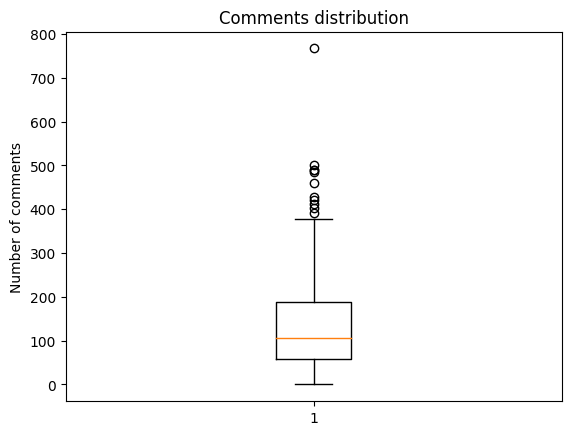

In [79]:
# create a boxplot of the comments column
plt.boxplot(posts_df['num_comments'])
plt.title('Comments distribution')
plt.ylabel('Number of comments')
plt.show()

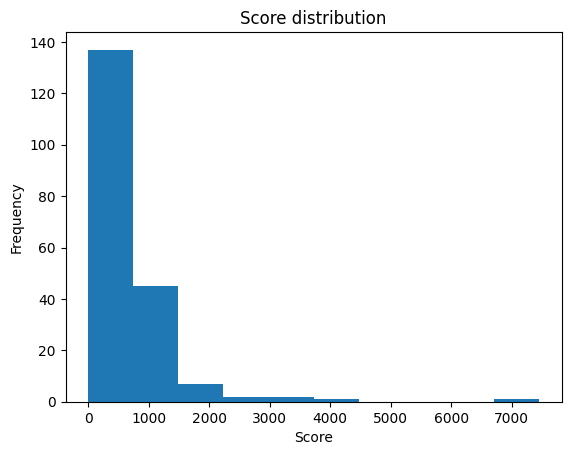

In [80]:
# create a histogram of the score column
plt.hist(posts_df['score'])
plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [81]:
# count the number of occurrences of each subreddit and display the top 10
posts_df = pd.DataFrame(posts_df)
top_subreddits = posts_df['subreddit'].value_counts().head(10)
print(top_subreddits)

sales           96
Entrepreneur    82
productivity    13
Alternatives     4
Name: subreddit, dtype: int64
